<a href="https://colab.research.google.com/github/lhcee3/Astronomical-Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Astronomical Data Visualization**

Final Outcome: To plot a Hertzsprung-Russel(HR) Diagram with the recived data.

To understand astronomical data.

To use seaborn and matplotlib visualise it.

CSV data file : https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#intoducing a pandas dataframe
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(5)



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
178,12100,120000.00000,708.90000,-7.840,5,Blue-White,B
206,24020,0.00159,0.01270,10.550,2,Blue,B
60,3341,0.00560,0.05700,16.230,0,Red,M
226,9892,593900.00000,80.00000,-7.262,4,Blue,O
148,7723,0.00014,0.00878,14.810,2,White,A


In [ ]:
#Creating a directory
folder_name = "star_plots"
os.makedirs(folder_name,exist_ok=True)
base_dir = f"/content/{folder_name}/"


The very First Visualizations...

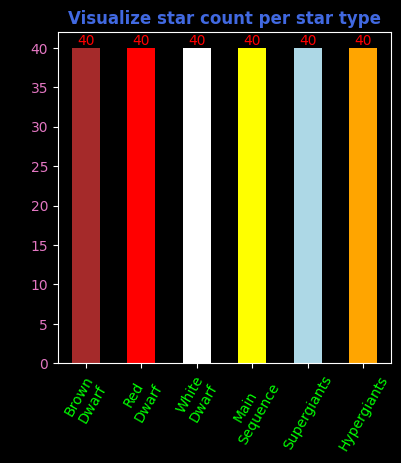

In [ ]:
plt.figure(figsize=(4.3,4.3))
plt.style.use('dark_background')
star_df["Star type"].value_counts().plot(kind='bar')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('Number of Stars', color='black', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=60, color='lime')
plt.savefig(base_dir+'star_count_type.png')
plt.show()

<ipython-input-5-9c5af80dc8b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


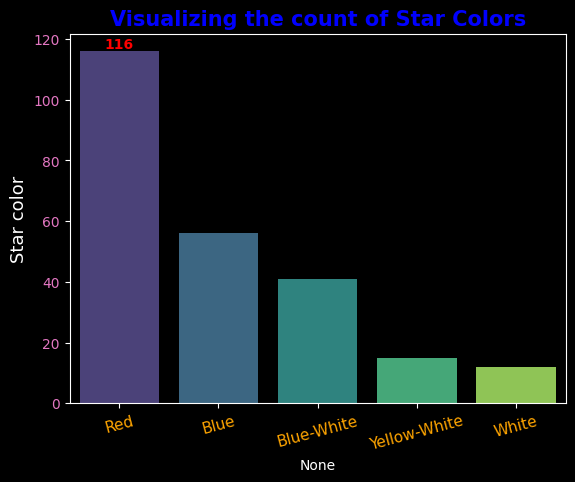

In [ ]:
#Using Seaborn for the same above task
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='blue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()


In [ ]:
#creating a boxplot alongside a subplot
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


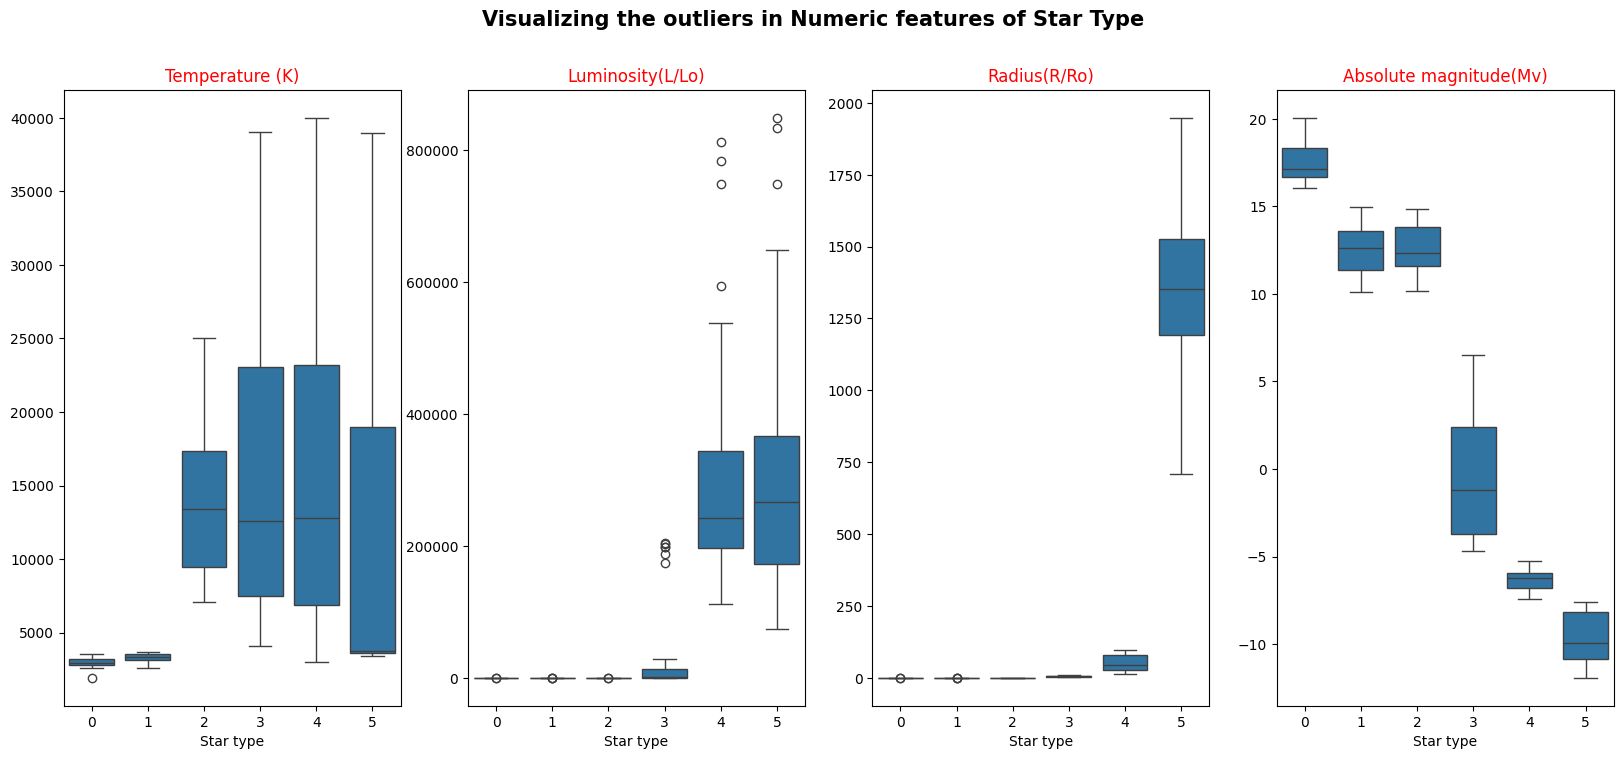

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

plt.savefig(base_dir+'box_plot_star_type.png')

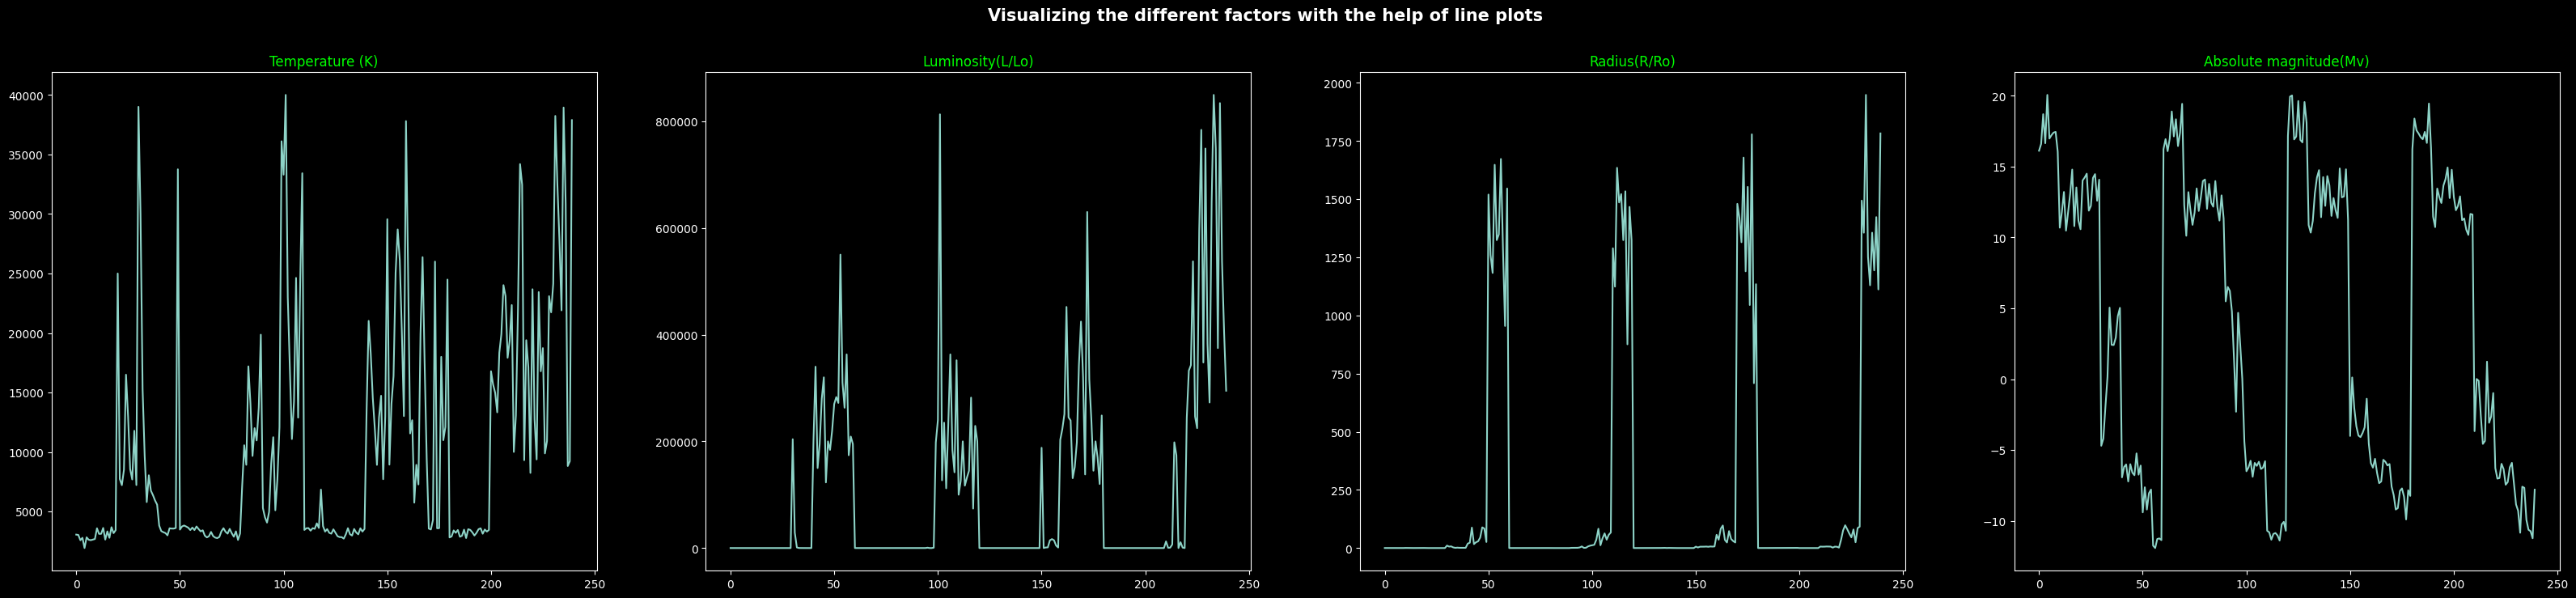

<Figure size 640x480 with 0 Axes>

In [ ]:
#line Plot
plt.figure(figsize=(40,8))
plt.style.use('dark_background')
plt.suptitle('Visualizing the different factors with the help of line plots',color='white',fontsize=15,weight='bold')


for i in range(4):
  plt.subplot(1,4,i+1)
  plt.plot(star_df.iloc[:,i])
  plt.title(star_df.columns[i],color ='lime')

plt.show()
plt.savefig(base_dir+'line_type_plt.png')


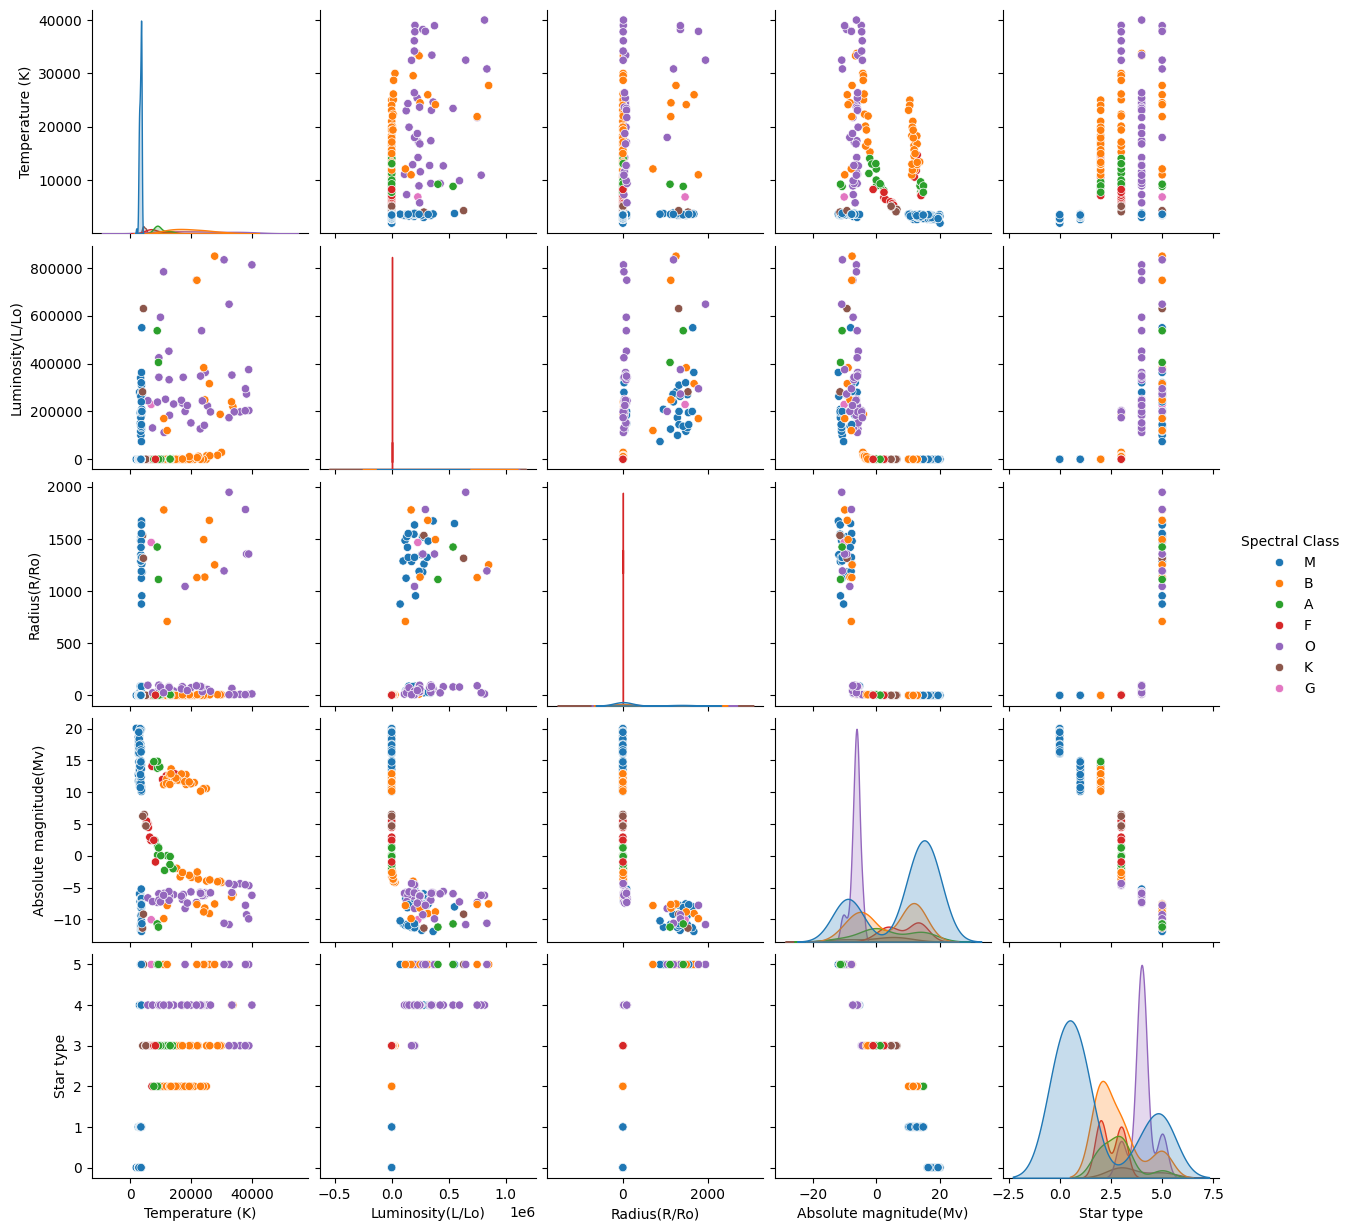

<Figure size 640x480 with 0 Axes>

In [ ]:
# create a pairplot -Scatter

plt.style.use('default')
sns.pairplot(star_df, hue = 'Spectral Class')
plt.show()

plt.savefig(base_dir+'scatter_plot.png')



In [ ]:
#making of the HR diagram
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values


#python dictionary which contains key-value pairs
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}


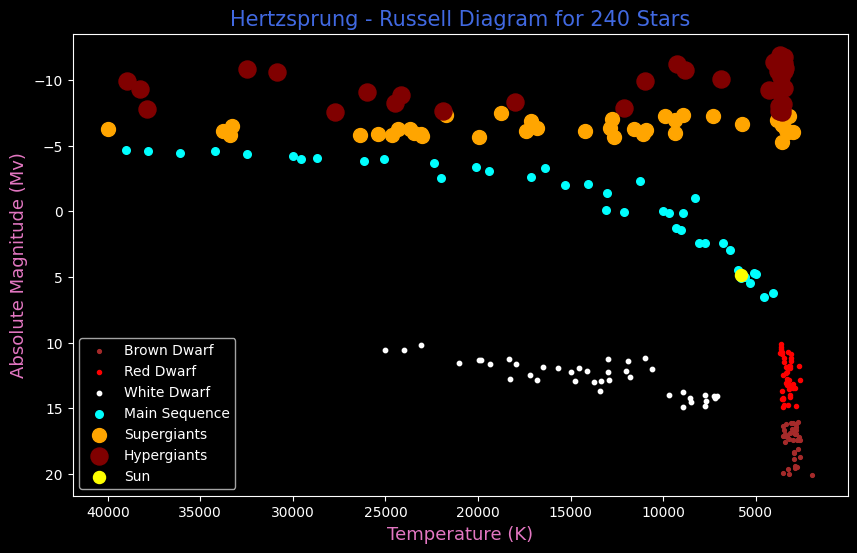

In [ ]:
axes = []
labels = set()

plt.figure(figsize=(10, 6))


for i in range(len(star_type)):


  properties = star_types[star_type[i]]


  if properties['label'] not in labels:

    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])

    axes.append(ax)
    labels.add(properties['label'])

  else:

    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])


ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')


plt.legend(handles=axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(base_dir+'hr_diagram.png')
plt.show()

In [ ]:
from google.colab import files
!zip -r /content/star_plots.zip /content/star_plots
files.download('/content/star_plots.zip')

  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/hr_diagram.png (deflated 6%)
  adding: content/star_plots/box_plot_star_type.png (deflated 21%)
  adding: content/star_plots/scatter_plot.png (deflated 90%)
  adding: content/star_plots/star_colors_viz.png (deflated 10%)
  adding: content/star_plots/line_type_plt.png (deflated 90%)
  adding: content/star_plots/star_count_type.png (deflated 11%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>